<a href="https://colab.research.google.com/github/elliot12-l/Ejercicios-Unidad-03-A/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polinomios de Taylor

In [ ]:
import sympy as sym
x = sym.Symbol("x")
y = sym.Symbol("y")

In [ ]:
fcn = lambda x: 1/(25*x**2+1)
taylor_approx(fcn=fcn, x0=0, n=5)

In [ ]:
fcn = lambda x: sym.atan(x)
taylor_approx(fcn=fcn, x0=1, n=5)

## Grafica de las aproximaciones de las funciones

Polinomios de Taylor para f1 = 1 / (25x^2 + 1):
Orden 2: 1 - 25*x**2
Orden 4: 625*x**4 - 25*x**2 + 1
Orden 6: -15625*x**6 + 625*x**4 - 25*x**2 + 1

Polinomios de Taylor para f2 = arctan(x):
Orden 2: -x**2/4 + x - 3/4 + pi/4
Orden 4: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Orden 6: x**6/48 - 3*x**5/20 + 7*x**4/16 - 7*x**3/12 + x**2/16 + x - 63/80 + pi/4

Polinomio de Lagrange para f1 = 1 / (25x^2 + 1):
1.0 - 0.961538461538461*x**2

Polinomio de Lagrange para f2 = arctan(x):
x*(1.01722196789785 - 0.231823804500403*x)


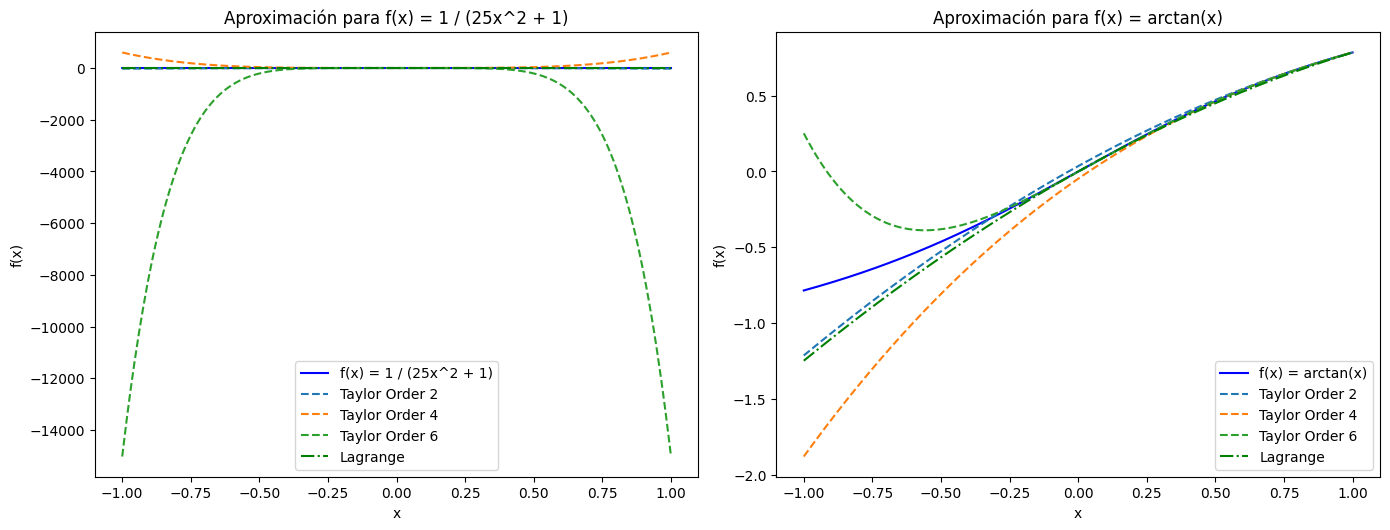

In [ ]:
from sympy import symbols, diff, factorial, simplify, expand, atan, lambdify
import numpy as np
import matplotlib.pyplot as plt

# Definir símbolo
x = symbols('x')

# Función 1: f(x) = 1 / (25x**2 + 1)
f1 = 1 / (25*x**2 + 1)
x0_1 = 0

# Función 2: f(x) = arctan(x)
f2 = atan(x)
x0_2 = 1

# Serie de Taylor
def taylor_series(f, x0, order):
    taylor_poly = 0
    for i in range(order + 1):
        term = (f.diff(x, i).subs(x, x0) / factorial(i)) * (x - x0)**i
        taylor_poly += term
    return simplify(taylor_poly)

# Polinomio de Lagrange
def lagrange_polynomial(points):
    n = len(points)
    poly = 0
    for i in range(n):
        xi, yi = points[i]
        term = yi
        for j in range(n):
            if i != j:
                xj = points[j][0]
                term *= (x - xj) / (xi - xj)
        poly += term
    return simplify(expand(poly))

# Orden de la serie de Taylor
orders = [2, 4, 6]

# Serie de Taylor para f1 en x0_1
taylor_approximations_f1 = [taylor_series(f1, x0_1, order) for order in orders]

# Serie de Taylor para f2 en x0_2
taylor_approximations_f2 = [taylor_series(f2, x0_2, order) for order in orders]

# Crear algunos puntos para el polinomio de Lagrange
points_f1 = [(-1, 1 / (25*(-1)**2 + 1)), (0, 1 / (25*(0)**2 + 1)), (1, 1 / (25*(1)**2 + 1))]
points_f2 = [(0, np.arctan(0)), (1, np.arctan(1)), (2, np.arctan(2))]

# Polinomios de Lagrange
lagrange_f1 = lagrange_polynomial(points_f1)
lagrange_f2 = lagrange_polynomial(points_f2)

# Mostrar los polinomios
print("Polinomios de Taylor para f1 = 1 / (25x^2 + 1):")
for i, poly in enumerate(taylor_approximations_f1):
    print(f"Orden {orders[i]}: {poly}")

print("\nPolinomios de Taylor para f2 = arctan(x):")
for i, poly in enumerate(taylor_approximations_f2):
    print(f"Orden {orders[i]}: {poly}")

print("\nPolinomio de Lagrange para f1 = 1 / (25x^2 + 1):")
print(lagrange_f1)

print("\nPolinomio de Lagrange para f2 = arctan(x):")
print(lagrange_f2)

# Crear funciones lambda para evaluar
taylor_f1_funcs = [lambdify(x, poly, 'numpy') for poly in taylor_approximations_f1]
taylor_f2_funcs = [lambdify(x, poly, 'numpy') for poly in taylor_approximations_f2]
lagrange_f1_func = lambdify(x, lagrange_f1, 'numpy')
lagrange_f2_func = lambdify(x, lagrange_f2, 'numpy')

# Evaluar en un rango de valores
x_vals = np.linspace(-1, 1, 400)
y_f1 = 1 / (25*x_vals**2 + 1)
y_f2 = np.arctan(x_vals)

# Graficar las aproximaciones
plt.figure(figsize=(14, 10))

# Aproximaciones para f1
plt.subplot(2, 2, 1)
plt.plot(x_vals, y_f1, label='f(x) = 1 / (25x^2 + 1)', color='blue')
for i, func in enumerate(taylor_f1_funcs):
    plt.plot(x_vals, func(x_vals), label=f'Taylor Order {orders[i]}', linestyle='--')
plt.plot(x_vals, lagrange_f1_func(x_vals), label='Lagrange', linestyle='-.', color='green')
plt.title('Aproximación para f(x) = 1 / (25x^2 + 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Aproximaciones para f2
plt.subplot(2, 2, 2)
plt.plot(x_vals, y_f2, label='f(x) = arctan(x)', color='blue')
for i, func in enumerate(taylor_f2_funcs):
    plt.plot(x_vals, func(x_vals), label=f'Taylor Order {orders[i]}', linestyle='--')
plt.plot(x_vals, lagrange_f2_func(x_vals), label='Lagrange', linestyle='-.', color='green')
plt.title('Aproximación para f(x) = arctan(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()
